# Analysing scan characteristics: Comparing subsets

**Note**: This tutorial follows and depends on the tutorials on [Reading PageXML files from archives](./Demo-reading-pagexml-files-from-archive.ipynb) and [Gathering scan characteristics](./Demo-analysing-scan-characteristics.ipynb). It assumes you 1) have downloaded the PageXML archives, 2) derived line format files from them, and 3) derived document statistics per scan and stored them in a TSV file. 

This tutorials shows how you can analyse the characteristics of subsets of PageXML files.

As an example of a zipped archive, this tutorial uses two datasets provided by the [National Archives of the Netherlands](https://www.nationaalarchief.nl/en) (NA) via their HTR repository on [Zenodo](https://zenodo.org/): https://zenodo.org/record/6414086#.Y8Elk-zMIUo. The repository contains many other HTR PageXML datasets that NA made available.

The datasets contains HTR output in [PageXML](https://www.primaresearch.org/tools/PAGELibraries) format of scans from the following archive: 
- (small) _Notaris mr. D.A.M.de Fremery te Assen, 1899-1915, 114.11, 1_ ([EAD](https://www.drentsarchief.nl/onderzoeken/archiefstukken?mivast=34&mizig=210&miadt=34&micode=0114.11&miview=inv2)). This is an archive maintained by the [Drents Archief](https://www.drentsarchief.nl).
- (medium) _Verspreide West-Indische stukken, 1614-1875, 1.05.06, 1-1413_ ([EAD](https://www.nationaalarchief.nl/onderzoeken/archief/1.05.06/invnr/%401?query=1.05.06&search-type=inventory)). This is an archive maintained by the [Nationaal Archief](https://www.nationaalarchief.nl/en). 

You can download the datasets via the following URLs:
- https://zenodo.org/record/6414086/files/HTR%20results%20DA%200114.11%20PAGE.zip?download=1
- https://zenodo.org/record/6414086/files/HTR%20results%201.05.06%20PAGE.zip?download=1


## Comparing Inventories: numbers of lines and words per scan

We start by looking at descriptive statistics per inventory on the number of lines and words. Big differences in median and mean numbers of words and lines per inventory signal that inventories contain different types of information on their scans. 

First, we look at inventories with the highest median number of lines per scan:

In [1]:
import pandas as pd
import seaborn as sns

sns.set_theme()

stats_file = '../data/na_scan_stats.tsv.gz'

df = pd.read_csv(stats_file, sep='\t', compression='gzip', index_col=False)

In [2]:
df.groupby('inv_num').lines.describe().sort_values('50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
inv_num,,,,,,,,
220,9.0,354.000000,291.980736,0.0,0.00,489.0,604.0,660.0
152,13.0,293.846154,210.249394,0.0,17.00,444.0,457.0,463.0
150,28.0,342.821429,146.928315,0.0,348.25,395.5,419.5,466.0
176,4.0,419.500000,486.183436,0.0,0.00,394.0,813.5,890.0
233,11.0,235.000000,148.666741,0.0,130.50,309.0,334.0,398.0
...,...,...,...,...,...,...,...,...
607,4.0,4.000000,8.000000,0.0,0.00,0.0,4.0,16.0
1235,3.0,17.000000,29.444864,0.0,0.00,0.0,25.5,51.0
42,5.0,21.600000,29.787581,0.0,0.00,0.0,49.0,59.0


For some inventories, the majority of scans have hundreds of lines per scan, for others, the majority have no lines, so are empty. Note that the mostly empty ones all tend to be very small inventories with only a handful of scans. 

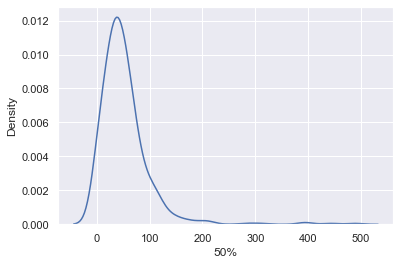

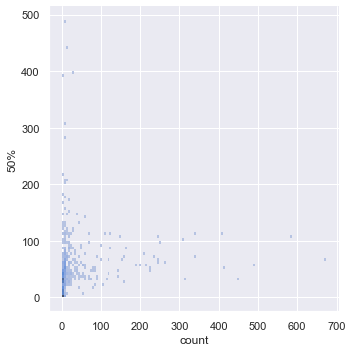

In [3]:
g = df.groupby('inv_num').lines.describe()
sns.kdeplot(data=g['50%']);
sns.displot(data=g, x='count', y='50%', binwidth=(5, 5))

There are _huge_ differences. Scans of inventory `220` have a median of 489 lines, while scans of inventory `472` have a median of 0 lines. We can generate clickable viewer URLs to visually inspect the scans of these inventories.

## Aggregating statistics per inventory by number of words

Which inventories have a high or low median number of words per scan? 

In [4]:
df.groupby('inv_num').words.describe().sort_values('50%', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
inv_num,,,,,,,,
564A,17.0,1198.588235,702.335929,0.0,605.00,1599.0,1712.0,1793.0
1200,8.0,1312.125000,1424.282921,0.0,0.00,1181.5,2435.0,3198.0
260,8.0,712.375000,455.888125,27.0,337.00,1019.5,1038.5,1043.0
122,10.0,836.200000,637.902257,0.0,243.75,961.5,1425.0,1530.0
1193,15.0,730.800000,340.024621,85.0,520.50,932.0,946.5,1037.0
1220,109.0,849.550459,227.721300,0.0,896.00,926.0,947.0,977.0
24,7.0,648.714286,377.932408,53.0,375.50,905.0,928.5,975.0
1218,148.0,849.918919,264.782044,0.0,667.00,901.5,1040.5,1328.0
714,27.0,784.518519,290.573487,0.0,824.00,888.0,950.0,975.0
